# SVM and Logistic Regression for persian number classification and tabular data

In [1]:
! wget https://github.com/Alireza-Akhavan/ML-notebooks/raw/refs/heads/main/dataset/Data_hoda_full.mat -P ./dataset
! wget https://raw.githubusercontent.com/Alireza-Akhavan/ML-notebooks/refs/heads/main/dataset.py

--2025-06-11 12:15:30--  https://github.com/Alireza-Akhavan/ML-notebooks/raw/refs/heads/main/dataset/Data_hoda_full.mat
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/Alireza-Akhavan/ML-notebooks/refs/heads/main/dataset/Data_hoda_full.mat [following]
--2025-06-11 12:15:31--  https://raw.githubusercontent.com/Alireza-Akhavan/ML-notebooks/refs/heads/main/dataset/Data_hoda_full.mat
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3989009 (3.8M) [application/octet-stream]
Saving to: ‘./dataset/Data_hoda_full.mat’

Data_hoda_full.mat  100%[===================>]   3.80M  --.-KB/s    in 0.1s    

2025-

In [2]:
from sklearn.svm import LinearSVC
from dataset import load_hoda

The effect of data normalization on training the SVM classifier is tested below.

In [3]:
X_train, y_train, X_test, y_test = load_hoda()

In [4]:
classifier = LinearSVC(random_state=42)
classifier.fit(X_train, y_train)

LinearSVC(random_state=42)

In [5]:
acc = classifier.score(X_test, y_test)
print(f"Accuracy: {acc*100:.2f}%")

Accuracy: 90.50%


In [6]:
X_train_norm = X_train/255
X_test_norm = X_test/255

In [7]:
classifier_norm = LinearSVC(random_state=42)
classifier_norm.fit(X_train_norm, y_train)

LinearSVC(random_state=42)

In [8]:
acc_norm = classifier_norm.score(X_test_norm, y_test)
print(f"Accuracy: {acc_norm*100:.2f}%")

Accuracy: 90.50%


No effect is observed. The reason may be that the features are all pixel values and of the same scale.

Below a case of a misclassified image is shown. The similarity between 2 and 7 in persian causes such a misclassification.

[2]
[2]
7


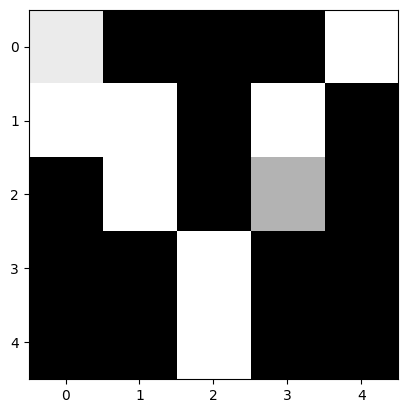

In [9]:
import matplotlib.pyplot as plt

i = 30
print(classifier_norm.predict([X_test_norm[i, :]]))
print(classifier.predict([X_test[i, :]]))
plt.imshow(X_test[i, :].reshape(5, 5), cmap='gray')
print(y_test[i])

Below, logistic regression is performed on the dataset. First, with no regularization and then, with L1 and L2 regularization. It can be seen that usage of regularization improves the accuracy by 1.5%, since it prevents the chances of overfitting.

In [10]:
from sklearn.linear_model import LogisticRegression, LinearRegression

In [11]:
logReg = LogisticRegression(penalty=None, random_state=42)
logReg.fit(X_train, y_train)
acc = logReg.score(X_test, y_test)
print(f"Accuracy: {acc*100:.2f}%")

Accuracy: 88.50%


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [12]:
logReg_l2 = LogisticRegression(solver='liblinear', penalty='l2', random_state=42)
logReg_l2.fit(X_train, y_train)
acc = logReg_l2.score(X_test, y_test)
print(f"Accuracy: {acc*100:.2f}%")

Accuracy: 90.00%


In [13]:
logReg_l1 = LogisticRegression(solver='liblinear', penalty='l1', random_state=42)
logReg_l1.fit(X_train, y_train)
acc = logReg_l1.score(X_test, y_test)
print(f"Accuracy: {acc*100:.2f}%")

Accuracy: 90.00%


Here we perform linear regression on a tabular data.

In [14]:
import pandas as pd
import numpy as np

file = 'https://raw.githubusercontent.com/emanhamed/Houses-dataset/master/Houses%20Dataset/HousesInfo.txt'
columns = ['bedroom', 'bathroom', 'area', 'zipcodes', 'price']
data = pd.read_csv(file, sep=' ', names=columns)

zip_number, count = np.unique(np.asarray(data['zipcodes']), return_counts= True)
zip_number = np.delete(zip_number, np.argwhere(count < 8))
for index, row in data.iterrows():
  if row['zipcodes'] not in zip_number:
    data.drop(index, inplace=True)

# np.unique(np.asarray(data['zipcodes']), return_counts= True)


In [15]:
data.isna().sum()

,0
bedroom,0
bathroom,0
area,0
zipcodes,0
price,0


In [16]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(data, test_size=0.2, random_state=21, shuffle=True)

In [17]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

transformer = ColumnTransformer(
    transformers=[
        ('scaler', StandardScaler(), ['bedroom', 'bathroom', 'area']),
        ('oneHot', OneHotEncoder(), ['zipcodes'])
    ]
)

transformer.fit(train)

train_transformed = transformer.transform(train)
test_transformed = transformer.transform(test)

In [18]:
linreg = LinearRegression()
linreg.fit(train.drop(['price'], axis=1), train['price'])
score = linreg.score(test.drop(['price'], axis=1), test['price'])
print(f"R^2: {score:.2f}")

R^2: 0.38


In [19]:
linreg = LinearRegression()
linreg.fit(train_transformed, train['price'])
score = linreg.score(test_transformed, test['price'])
print(f"R^2: {score:.2f}")

R^2: 0.64


In [20]:
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
                'Acceleration', 'Model Year', 'Origin']

raw_dataset = pd.read_csv(url, names=column_names,
                          na_values='?', comment='\t',
                          sep=' ', skipinitialspace=True)
raw_dataset

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1


In [21]:
print(raw_dataset.isna().sum())
len(raw_dataset)

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64


398

In [22]:
raw_dataset = raw_dataset.dropna()
len(raw_dataset)

392

In [23]:
train, test = train_test_split(raw_dataset, test_size=0.2, random_state=21, shuffle=True)

In [24]:
transformer = ColumnTransformer(
    transformers=[
        ('scaler', StandardScaler(), ['Cylinders', 'Displacement', 'Horsepower', 'Weight',
                                      'Acceleration', 'Model Year', 'Origin'])
    ]
)

transformer.fit(train)

train_transformed = transformer.transform(train)
test_transformed = transformer.transform(test)

In [25]:
linreg = LinearRegression()
linreg.fit(train_transformed, train['MPG'])
score = linreg.score(test_transformed, test['MPG'])
print(f"R^2: {score:.2f}")

R^2: 0.84
